# Discrete

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binom, bernoulli, multinomial, poisson
import numpy as np

## Binomial

Toss a coint $n$ times with $k$ times success, probability of head is $\theta$, $X \in \{0, ..., n\}$.

- **PMF**
$$Bin(k|n, \theta) = {{n}\choose{k}}\theta^k (1 - \theta)^{n - k}$$

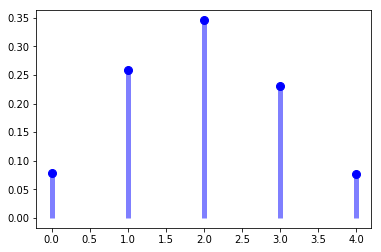

In [2]:
# setup experiment
n = 5
theta = 0.4
k = x = np.arange(binom.ppf(0.01, n, theta), binom.ppf(0.99, n, theta))
y = binom.pmf(k, n, theta)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', ms=8, label='binom pmf')
ax.vlines(x, ymin=0, ymax=y, colors='b', lw=5, alpha=0.5)

## Bernouli

Toss a coin only once $X \in \{0, 1\}$.

- **PMF**
$$Ber(x | \theta) = \theta^{\mathbf{I}(x = 1)} (1 - \theta)^{\mathbf{I}(x = 0)}$$

- **Likelihood**
$$L(p) = log(p) = klog(\theta) + (n - k)log(1 - \theta)$$

- **MLE**
$$\frac{d L(p)}{d \theta} = 0 \iff k\frac{1}{\theta} - (n - k)\frac{1}{1 - \theta} = 0$$
$$\theta_{MLE} = \frac{k}{n}$$

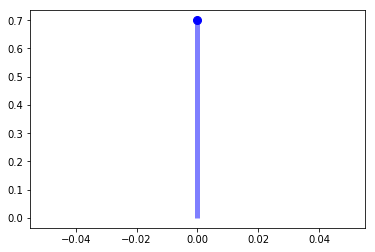

In [3]:
# setup experiment
theta = 0.3
k = x = np.arange(bernoulli.ppf(0.01, theta), bernoulli.ppf(0.99, theta))
y = bernoulli.pmf(k, theta)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)

## Multinomial

## Multinouli

## Poisson

## Emperical

# Continuous

## Normal

- **Probability density function**
$$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

- **Likelihood**
$$L(\mu, \sigma^2) = \prod_{i=1}^n f(x_i | \mu, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} = (2\pi\sigma^2)^{-n/2} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2}$$

- **Log-likelihood**
$$ln L(\mu, \sigma^2) = \sum_{i=1}^n ln f(x_i | \mu, \sigma^2) = -\frac{n}{2} ln(2\pi) - \frac{n}{2} ln \sigma^2 - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2$$

- **MLE**: Taking derivatives with respect to $\mu$ and $\sigma^2$.
$$\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i$$
$$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2$$

- **Prior**
$$p(y)$$

- **Posterior**
$$p(y|x) = \frac{p(x|y) p(y)}{p(x)}$$
- **Posterior predictive distribution**
- https://en.wikipedia.org/wiki/Conjugate_prior

## Laplace

## Gamma

## Beta

## Pareto